<a href="https://colab.research.google.com/github/XuZhaozhong-1/Xzz/blob/main/Lab_427_Zhaozhong_Xu_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification with Regression

In [367]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch

In [368]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [369]:
# Upload the file to Google Drive first and then read data from it in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
from IPython.display import Image # For displaying images in colab jupyter cell

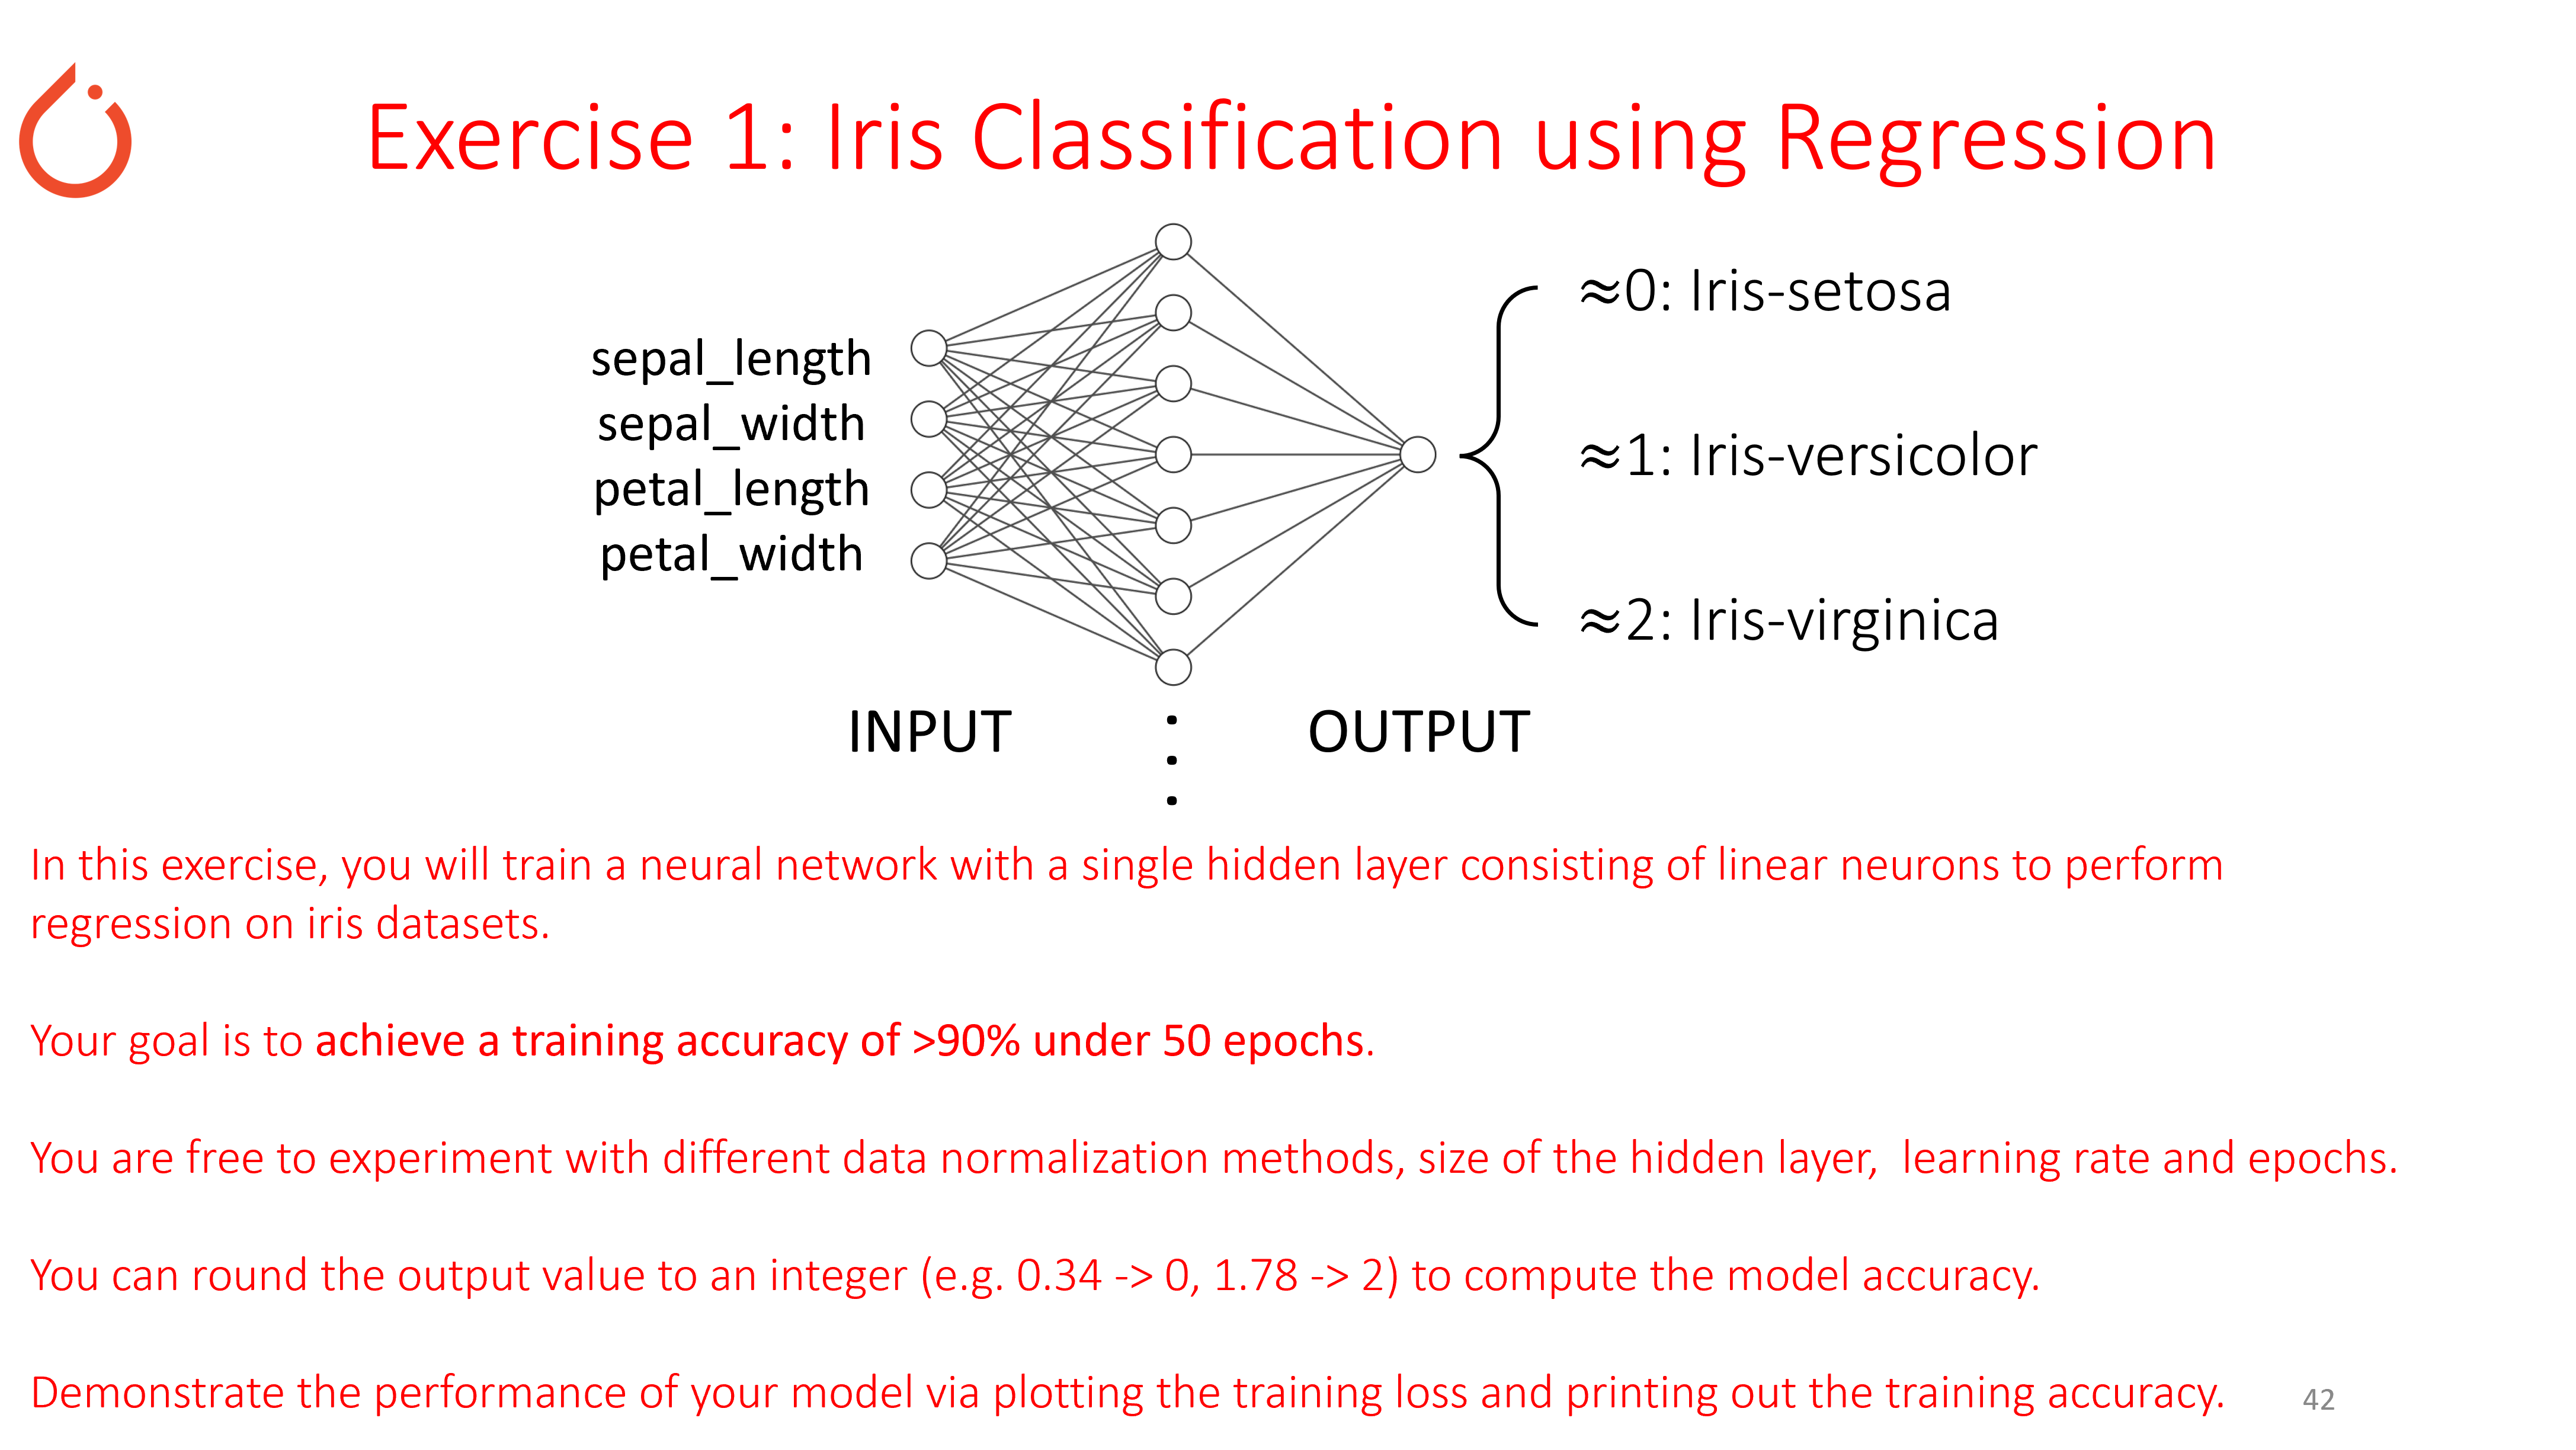

In [371]:
Image('/content/drive/My Drive/lab2_exercise1.png', width = 1000)

# Prepare Data

In [372]:
from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']
# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']


# Feel free to perform additional data processing here (e.g. standard scaling)

In [373]:
# Standard scaling function
def scale_data(arr):
  scaled_data=np.empty_like(arr)
  for i in range(arr.shape[1]):
    mean = np.mean(arr[:, i])
    std = np.std(arr[:, i])
    scaled_data[:, i] = (arr[:, i] - mean) / std

  return scaled_data
x_train=scale_data(X_train)

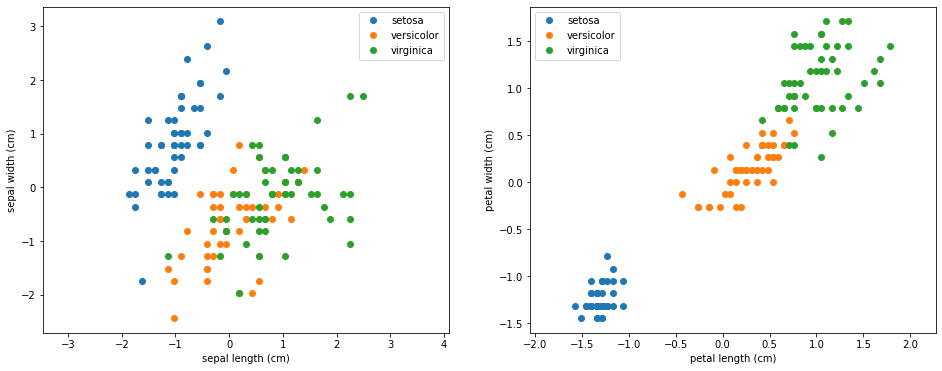

In [374]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):
    
    # Subset the rows of X_train that fall into each flower category using boolean mapping
    x_plot = x_train[y_train == target]
    
    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(x_plot[:, 0], x_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):
    
    x_plot = x_train[y_train == target]
    
    ax2.plot(x_plot[:, 2], x_plot[:, 3], linestyle='none', marker='o', label=target_name)
    
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

# Define Model


In [375]:
class irisClassification(torch.nn.Module):
    
    def __init__(self, input_dim,hidden_dim,output_dim):
        
        super(irisClassification, self).__init__()
        
        self.input_layer = torch.nn.Linear(input_dim,hidden_dim)
        self.hidden_layer = torch.nn.Linear(hidden_dim,output_dim)
    def forward(self, x):
        out = self.input_layer(x)
        out = torch.relu(out)
        out = self.hidden_layer(out)
        out = torch.softmax(out, dim=1)
        return out

# Define Hyperparameters

In [376]:
# Initialize our neural network model with input and output dimensions
model = irisClassification(input_dim = 4,hidden_dim=6,output_dim = 3)

# Define the learning rate and epoch (# of iterations)
learning_rate = 0.7
epochs = 40

# Define loss function and optimizer
loss_func = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# Identify Tracked Values

In [377]:
# Define a list or numpy array placeholder to keep track of our training loss

train_loss_list = []

# Train Model

In [378]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()#The cross-entropy loss function expects the label data to be of type LongTensor.

# TRAINING LOOP-------------------------------------------------------------------------

for epoch in range(epochs): # For each epoch (i.e. single pass on the training dataset)

    optimizer.zero_grad() # Empty the gradient buffer so each learning event per epoch is separate

    outputs = model(x_train) # Forward pass the inputs through the network to produce outputs 

    loss = loss_func(outputs, y_train) # Compute the loss via comparing the output with expected targets
    
    train_loss_list.append(loss.item()) # Save the loss value to train_loss_list we defined
    
    loss.backward() # Compute how much changes to be made to weights/biases

    optimizer.step() # Update the weights/biases according to learning rate

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1.1011981964111328
epoch 1, loss 1.092398762702942
epoch 2, loss 1.0831941366195679
epoch 3, loss 1.0726923942565918
epoch 4, loss 1.060835838317871
epoch 5, loss 1.0467158555984497
epoch 6, loss 1.0294477939605713
epoch 7, loss 1.0077264308929443
epoch 8, loss 0.9808251857757568
epoch 9, loss 0.948931872844696
epoch 10, loss 0.9138192534446716
epoch 11, loss 0.8796058297157288
epoch 12, loss 0.8505701422691345
epoch 13, loss 0.8279720544815063
epoch 14, loss 0.8105654716491699
epoch 15, loss 0.7969055771827698
epoch 16, loss 0.7857178449630737
epoch 17, loss 0.7761749625205994
epoch 18, loss 0.7677513360977173
epoch 19, loss 0.7601271271705627
epoch 20, loss 0.7531057596206665
epoch 21, loss 0.7466133832931519
epoch 22, loss 0.7405931353569031
epoch 23, loss 0.7349526882171631
epoch 24, loss 0.7296189665794373
epoch 25, loss 0.7245718836784363
epoch 26, loss 0.7198436260223389
epoch 27, loss 0.715408980846405
epoch 28, loss 0.7112383246421814
epoch 29, loss 0.70730161666

# Visualize and Evaluate Model

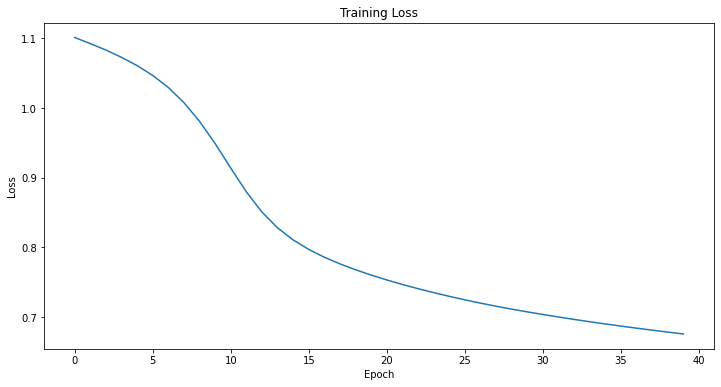

In [379]:
# Plot your training loss throughout the training
# Include proper x and y labels for the plot

plt.figure(figsize=(12, 6))
#Define x axis values as the number of epochs
x= range(epochs)
# Plot the training loss as a function of the number of epochs
plt.plot(x, train_loss_list)
# Set the plot title and labels for the x and y axes
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [380]:
# Confirm that your model's training accuracy is >90%
with torch.no_grad():#Indicates that we don't need to compute gradients in the following code block (used for evaluation)
    outputs = model(x_train)
    _, predicted = torch.max(outputs, 1)# Find the index  with the highest probability for each sample
    correct = (predicted == y_train).sum().item()
    total = y_train.size(0)
    accuracy = correct / total
    print('Accuracy: {:.2f}'.format(accuracy))
  

Accuracy: 0.94
